In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress

In [13]:
# Load the dataset
data = pd.read_csv("used_cars.csv")

def clean_data(data):
    # Check for missing values in specified columns
    columns_to_check = ['car_brand', 'car_model', 'car_price', 'car_city', 'car_fuel', 'car_transmission', 'car_drive', 'car_mileage', 'car_country', 'car_engine_capacity', 'car_engine_hp', 'car_age']
    missing_values = data[columns_to_check].isnull().any()
    if missing_values.any():
        print("Warning: There are missing values in the specified columns.")
        print(data[columns_to_check].isnull().sum())

    # Drop rows with missing values
    data.dropna(subset=columns_to_check, inplace=True)

    # Convert categorical variables to numeric
    data = pd.get_dummies(data, columns=['car_brand', 'car_model', 'car_city', 'car_fuel', 'car_transmission', 'car_country'])
    return data

# Clean the data and return the cleaned data table
cleaned_data = clean_data(data)
cleaned_data.head()  # Return the first few rows of the cleaned data table

,Unnamed: 0,car_price,car_drive,car_mileage,car_engine_capacity,car_engine_hp,car_age,car_brand_AITO,car_brand_Acura,car_brand_Alfa Romeo,...,car_country_IT,car_country_JP,car_country_KR,car_country_KR,car_country_RUS,car_country_SE,car_country_UK,car_country_UKR,car_country_USA,car_country_UZ
0,0,550000,FWD,300000,1.8,125,14,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,1820000,FWD,88000,1.6,156,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2600000,4WD,19000,1.5,150,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,4200000,FWD,30000,3.5,249,2,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,4,2125000,FWD,18824,1.5,147,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False


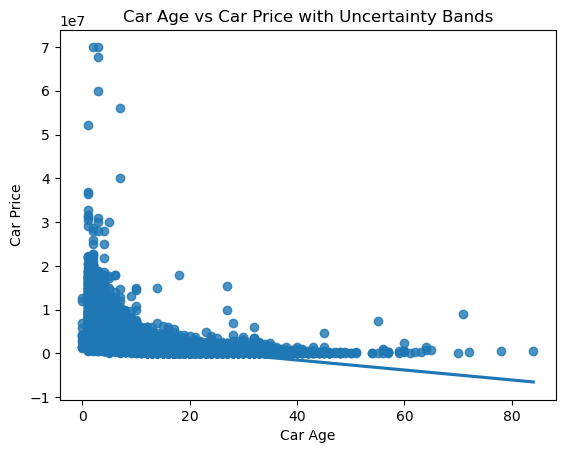

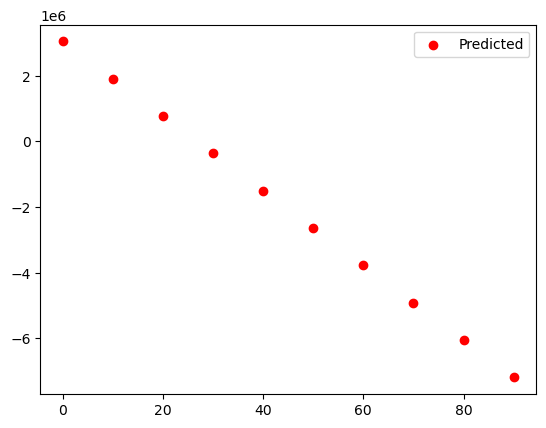

In [16]:
# Define the fitting function
def fitting(data):
    # Perform line fitting
    slope, intercept, r_value, p_value, std_err = linregress(data['car_age'], data['car_price'])
    return slope, intercept

# Call the fitting function
slope, intercept = fitting(cleaned_data)

# Define the plot_relational_graph function
def plot_relational_graph(data, slope, intercept):
    # Scatter plot with line fit and uncertainty bands
    sns.regplot(x='car_age', y='car_price', data=data, ci=95)
    plt.xlabel('Car Age')
    plt.ylabel('Car Price')
    plt.title('Car Age vs Car Price with Uncertainty Bands')
    plt.show()

    # Generate predicted points beyond the fit range
    x_range = np.arange(data['car_age'].min(), data['car_age'].max() + 10, 10)
    predicted_values = slope * x_range + intercept
    plt.scatter(x_range, predicted_values, color='red', label='Predicted', zorder=5)
    plt.legend()
    plt.show()

# Plot relational graph
plot_relational_graph(cleaned_data, slope, intercept)


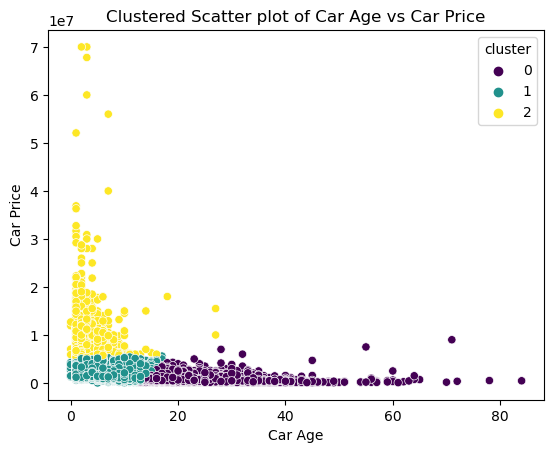

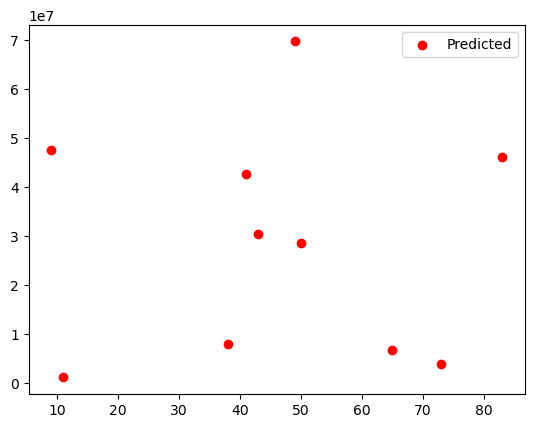

In [17]:
def plot_clustered_graph(data):
    # Perform clustering
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[['car_age', 'car_price']])
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set n_init explicitly
    data['cluster'] = kmeans.fit_predict(scaled_data)

    # Scatter plot of clustered data
    sns.scatterplot(x='car_age', y='car_price', data=data, hue='cluster', palette='viridis')
    plt.xlabel('Car Age')
    plt.ylabel('Car Price')
    plt.title('Clustered Scatter plot of Car Age vs Car Price')
    plt.show()

    # Generate some predicted values
    predicted_age = np.random.randint(data['car_age'].min(), data['car_age'].max(), 10)
    predicted_price = np.random.randint(data['car_price'].min(), data['car_price'].max(), 10)
    plt.scatter(predicted_age, predicted_price, color='red', label='Predicted')
    plt.legend()
    plt.show()

# Plot clustered graph
plot_clustered_graph(cleaned_data)

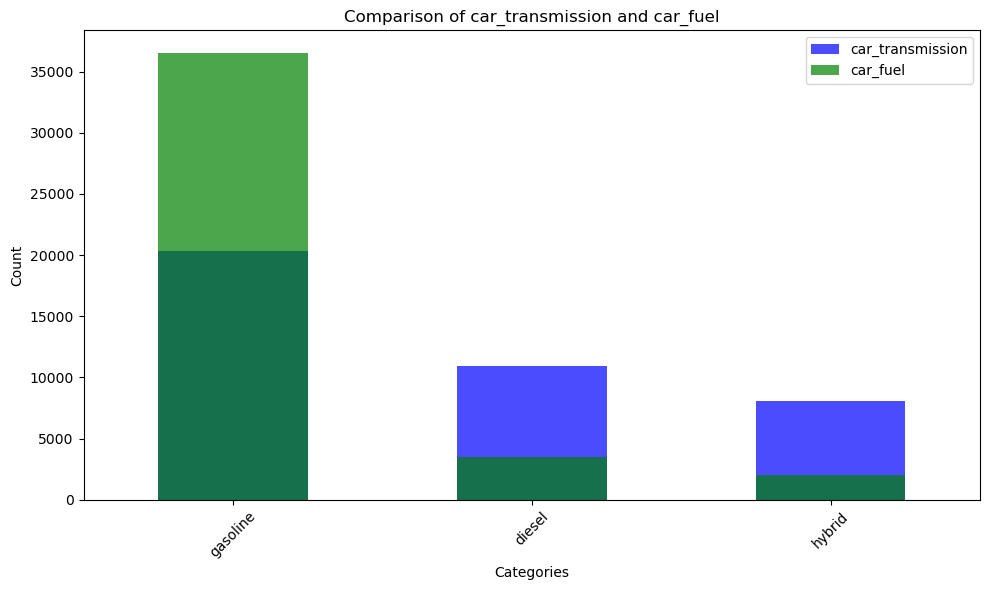

In [19]:
# Columns for comparison
column1 = 'car_transmission'
column2 = 'car_fuel'

# Count the occurrences of each category in each column
counts_column1 = data[column1].value_counts()
counts_column2 = data[column2].value_counts()

def plot_categorical_graph(data):
    # Create a bar plot to compare the two columns
    plt.figure(figsize=(10, 6))
    counts_column1.plot(kind='bar', color='blue', alpha=0.7, label=column1)
    counts_column2.plot(kind='bar', color='green', alpha=0.7, label=column2)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title('Comparison of ' + column1 + ' and ' + column2)
    plt.legend()
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

# Plot categorical graph
plot_categorical_graph(cleaned_data)

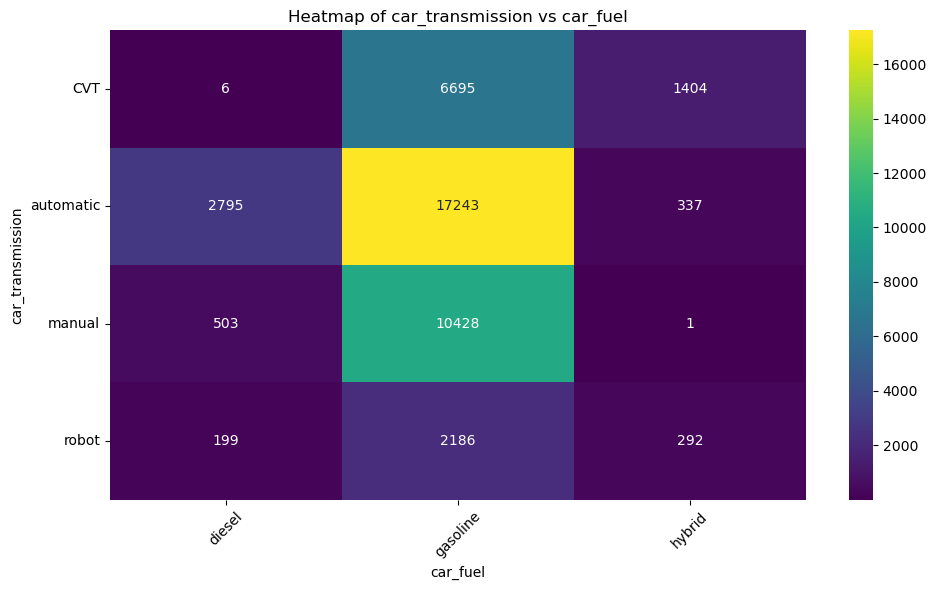

In [120]:
# Columns for comparison
categorical_column1 = 'car_transmission'
categorical_column2 = 'car_fuel'

# Create a cross-tabulation of the two categorical variables
cross_tab = pd.crosstab(data[categorical_column1], data[categorical_column2])

def plot_statistical_graph(data):
    # Create a heatmap to visualize the cross-tabulation
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d')
    plt.xlabel(categorical_column2)
    plt.ylabel(categorical_column1)
    plt.title('Heatmap of ' + categorical_column1 + ' vs ' + categorical_column2)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)   # Ensure y-axis labels are not rotated
    plt.tight_layout()
    plt.show()

# Plot statistical graph
plot_statistical_graph(cleaned_data)

In [92]:
def calculate_statistical_moments(data):
    # Calculate mean, median, standard deviation, skewness, and kurtosis
    moments = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Standard Deviation': np.std(data),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    return moments

# Calculate statistical moments
moments = calculate_statistical_moments(cleaned_data['car_price'])
for moment, value in moments.items():
    print(f"{moment}: {value}")

Mean: 1712716.6593409204
Median: 1250000.0
Standard Deviation: 1976669.3965921274
Skewness: 8.385723462913422
Kurtosis: 173.94108094393107


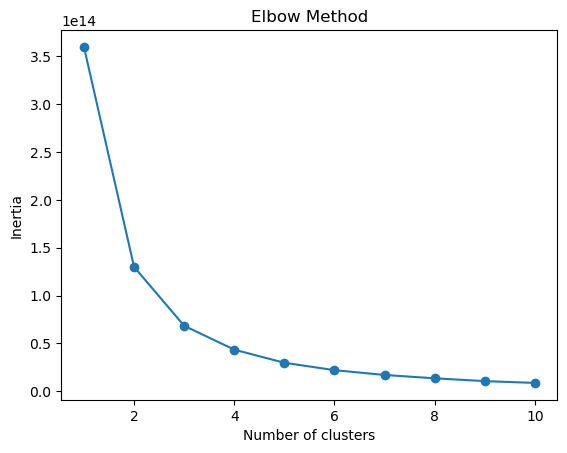

Line equation: y = -113683.73731538343x + 3042504.956937287


In [93]:
def plot_elbow_method(data):
    # Elbow method to determine optimal number of clusters
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, 11), inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

def clustering(data):
    # Perform clustering
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly set n_init
    clustered_data = data.copy()  # Make a copy to avoid modifying original DataFrame
    clustered_data['cluster'] = kmeans.fit_predict(scaled_data)
    return clustered_data

def fitting(data):
    # Perform line fitting
    slope, intercept, r_value, p_value, std_err = linregress(data['car_age'], data['car_price'])
    return slope, intercept

# Plot elbow method
plot_elbow_method(data[['car_age', 'car_mileage']])

# Perform clustering
clustered_data = clustering(data[['car_age', 'car_mileage']])

# Perform fitting
slope, intercept = fitting(data[['car_age', 'car_price']])
print(f"Line equation: y = {slope}x + {intercept}")